In [4]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import regex as re

In [26]:
import pandas as pd

# Load the dataset
asthma_data = pd.read_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv")

# Display unique questions to identify the vaccine-related ones
print(asthma_data['Question'].unique())


['Current asthma prevalence among adults aged >= 18 years'
 'Asthma prevalence among women aged 18-44 years'
 'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'
 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma'
 'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma'
 'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma']


In [29]:
# asthma_df = pd.read_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv")
# asthma_df.head()

In [27]:
# Filter data for influenza and pneumococcal vaccines
flu_vaccine_data = asthma_data[asthma_data['Question'].str.contains('influenza', case=False)]
pneumo_vaccine_data = asthma_data[asthma_data['Question'].str.contains('pneumococcal', case=False)]

# Display the first few rows of the filtered data to confirm
print(flu_vaccine_data.head())
print(pneumo_vaccine_data.head())


    YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
4        2021     2021           DC  District of Columbia      BRFSS  Asthma   
6        2021     2021           KS                Kansas      BRFSS  Asthma   
7        2021     2021           MA         Massachusetts      BRFSS  Asthma   
12       2021     2021           AK                Alaska      BRFSS  Asthma   
15       2021     2021           AL               Alabama      BRFSS  Asthma   

                                                                                Question  \
4   Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma   
6   Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma   
7   Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma   
12  Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma   
15  Influenza vaccination among noninstitutionalized adults

In [30]:
# Group influenza vaccine data by state and get the sum of vaccination rates
flu_vaccine_by_state = flu_vaccine_data.groupby('LocationDesc')['DataValue'].sum().reset_index()

# Group pneumococcal vaccine data by state and get the sum of vaccination rates
pneumo_vaccine_by_state = pneumo_vaccine_data.groupby('LocationDesc')['DataValue'].sum().reset_index()

# Rename columns for clarity
flu_vaccine_by_state.columns = ['State', 'FluVaccineRate']
pneumo_vaccine_by_state.columns = ['State', 'PneumoVaccineRate']

# Merge the two datasets for side-by-side comparison
vaccine_data = pd.merge(flu_vaccine_by_state, pneumo_vaccine_by_state, on='State', how='inner')

# Display the merged dataset
print(vaccine_data.head())


        State  FluVaccineRate  PneumoVaccineRate
0     Alabama           209.7              205.1
1      Alaska           209.7              223.8
2     Arizona           206.1              233.9
3    Arkansas           202.0              231.3
4  California           215.1              219.9


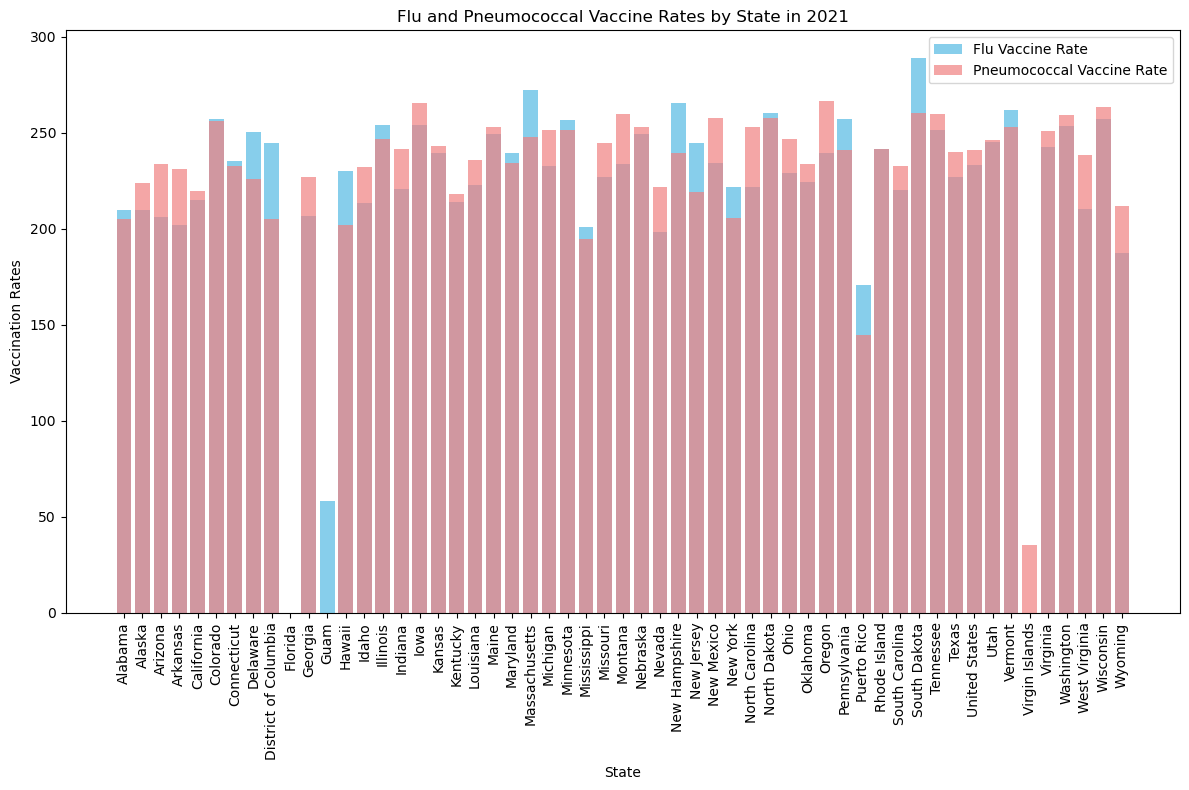

In [31]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create bar charts for influenza and pneumococcal vaccine rates
plt.bar(vaccine_data['State'], vaccine_data['FluVaccineRate'], label='Flu Vaccine Rate', color='skyblue')
plt.bar(vaccine_data['State'], vaccine_data['PneumoVaccineRate'], label='Pneumococcal Vaccine Rate', color='lightcoral', alpha=0.7)

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Vaccination Rates')
plt.title('Flu and Pneumococcal Vaccine Rates by State in 2021')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
asthma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  605 non-null    int64  
 1   YearEnd                    605 non-null    int64  
 2   LocationAbbr               605 non-null    object 
 3   LocationDesc               605 non-null    object 
 4   DataSource                 605 non-null    object 
 5   Topic                      605 non-null    object 
 6   Question                   605 non-null    object 
 7   Response                   0 non-null      float64
 8   DataValueUnit              605 non-null    object 
 9   DataValueType              605 non-null    object 
 10  DataValue                  579 non-null    float64
 11  DataValueAlt               579 non-null    float64
 12  DataValueFootnoteSymbol    37 non-null     object 
 13  DatavalueFootnote          37 non-null     object 

In [5]:
asthma_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [7]:
data_2021 = asthma_df[(asthma_df['YearStart'] == 2021)]

In [9]:
#Extract only the rows where 'StratificationCategory1' is 'Gender'
gender_data = data_2021[data_2021['StratificationCategory1'] == 'Gender']
# Display the extracted gender data
print("\nGender Data:")
print(gender_data)
# Extract only the rows where 'StratificationCategory1' is 'Race/Ethnicity'
ethnicity_data = data_2021[data_2021['StratificationCategory1'] == 'Race/Ethnicity']
# Display the extracted ethnicity data
print("\nRace/Ethnicity Data:")
print(ethnicity_data)

gender_data.head()

ethnicity_data.head()


Gender Data:
Empty DataFrame
Columns: [YearStart, YearEnd, LocationAbbr, LocationDesc, DataSource, Topic, Question, Response, DataValueUnit, DataValueType, DataValue, DataValueAlt, DataValueFootnoteSymbol, DatavalueFootnote, LowConfidenceLimit, HighConfidenceLimit, StratificationCategory1, Stratification1, StratificationCategory2, Stratification2, StratificationCategory3, Stratification3, GeoLocation, ResponseID, LocationID, TopicID, QuestionID, DataValueTypeID, StratificationCategoryID1, StratificationID1, StratificationCategoryID2, StratificationID2, StratificationCategoryID3, StratificationID3]
Index: []

[0 rows x 34 columns]

Race/Ethnicity Data:
Empty DataFrame
Columns: [YearStart, YearEnd, LocationAbbr, LocationDesc, DataSource, Topic, Question, Response, DataValueUnit, DataValueType, DataValue, DataValueAlt, DataValueFootnoteSymbol, DatavalueFootnote, LowConfidenceLimit, HighConfidenceLimit, StratificationCategory1, Stratification1, StratificationCategory2, Stratification2, St

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3


In [10]:
asthma_gender_df = pd.DataFrame(gender_data)

asthma_race_df = pd.DataFrame(ethnicity_data)

In [11]:
asthma_gender_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3


In [12]:
asthma_race_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3


In [13]:
asthma_race_df.to_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv", index=False)

asthma_gender_df.to_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv", index=False)

In [14]:
overall_data = data_2021[data_2021['StratificationCategory1'] == 'Overall']
# Display the extracted ethnicity data
print("\nOverall Data:")
print(overall_data)


Overall Data:
     YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0         2021     2021           OH                  Ohio      BRFSS  Asthma   
1         2021     2021           NE              Nebraska      BRFSS  Asthma   
2         2021     2021           ND          North Dakota      BRFSS  Asthma   
3         2021     2021           AZ               Arizona      BRFSS  Asthma   
4         2021     2021           DC  District of Columbia      BRFSS  Asthma   
..         ...      ...          ...                   ...        ...     ...   
600       2021     2021           WY               Wyoming      BRFSS  Asthma   
601       2021     2021           WY               Wyoming      BRFSS  Asthma   
602       2021     2021           WY               Wyoming      BRFSS  Asthma   
603       2021     2021           WY               Wyoming      BRFSS  Asthma   
604       2021     2021           WY               Wyoming      BRFSS  Asthma   

            

In [15]:
asthma_overall_df = pd.DataFrame(overall_data)

In [16]:
asthma_overall_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2021,2021,OH,Ohio,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,39,AST,AST1_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2021,2021,NE,Nebraska,BRFSS,Asthma,Current asthma prevalence among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,31,AST,AST1_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2021,2021,ND,North Dakota,BRFSS,Asthma,Asthma prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,38,AST,AST1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2021,2021,AZ,Arizona,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Age-adjusted Prevalence,...,4,AST,AST6_2,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2021,2021,DC,District of Columbia,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Age-adjusted Prevalence,...,11,AST,AST5_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST6_2,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
601,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma,NaN,%,Crude Prevalence,...,56,AST,AST6_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
602,2021,2021,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST6_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
603,2021,2021,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,NaN,%,Age-adjusted Prevalence,...,56,AST,AST5_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [17]:
asthma_overall_df.to_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv", index=False)

In [21]:
# Visualization using Matplotlib (Python)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
import pandas as pd

# Load the data and inspect the columns
gender_data = pd.read_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv")
print(gender_data.columns)


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


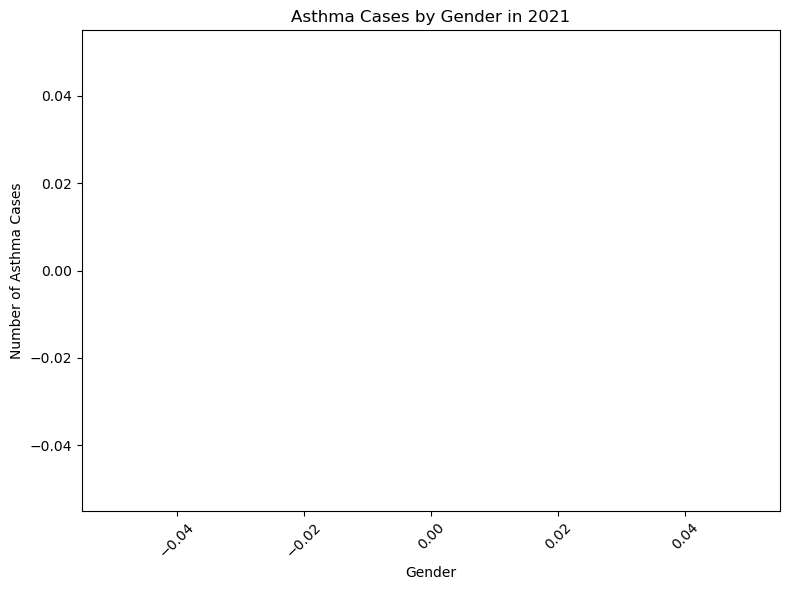

In [22]:

# Load the gender data from CSV
gender_data = pd.read_csv(r"C:\Users\parme\OneDrive\Desktop\project_3\US chronic Asthma.csv")

# Filter the data to only include gender-related entries
gender_data_filtered = gender_data[gender_data['StratificationCategory1'] == 'Gender']

# Group by 'Stratification1' (gender values) and sum the asthma cases
gender_grouped = gender_data_filtered.groupby('Stratification1')['DataValue'].sum().reset_index()

# Create a bar chart for asthma cases by gender
plt.figure(figsize=(8, 6))
plt.bar(gender_grouped['Stratification1'], gender_grouped['DataValue'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Number of Asthma Cases')
plt.title('Asthma Cases by Gender in 2021')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('asthma_cases_by_gender_2021.png')

# Show the plot
plt.show()

